In [8]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib import animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
import networkx as nx
np.set_printoptions(threshold=np.nan)

Path = '/home/emma/StudyGroup/'

In [9]:
IP_farms = pd.read_csv(Path + "IPFarms2001", delim_whitespace=True, names = ['Farm Number', 'Date Infected'])
Data_farms =pd.read_csv(Path + "FarmData2001", delim_whitespace=True, names = ['County Number', 'Parish Number', 'Holding Number'
,'X coordinate','Y coordinate','Farm Area','Number of cattle','Number of pigs','Number of sheep','Number of goats','Number of other animals'])
Cull_farms = pd.read_csv(Path + "CullFarms2001", delim_whitespace=True, names = ['Farm Number', 'Date Culled'])

In [10]:
Data_farms['X coordinate'];

In [11]:
IP_farms = IP_farms.set_index('Farm Number')
IP_farms['Date Culled'] = IP_farms['Date Infected'] +2
Cull_farms = Cull_farms.set_index('Farm Number')

In [12]:
data = pd.merge(IP_farms, Cull_farms, on = 'Date Culled', how='outer', left_index=True,right_index=True)

In [13]:
Data = pd.concat([data, Data_farms], axis =1)
Data = abs(Data)

In [30]:
len(culled)

317

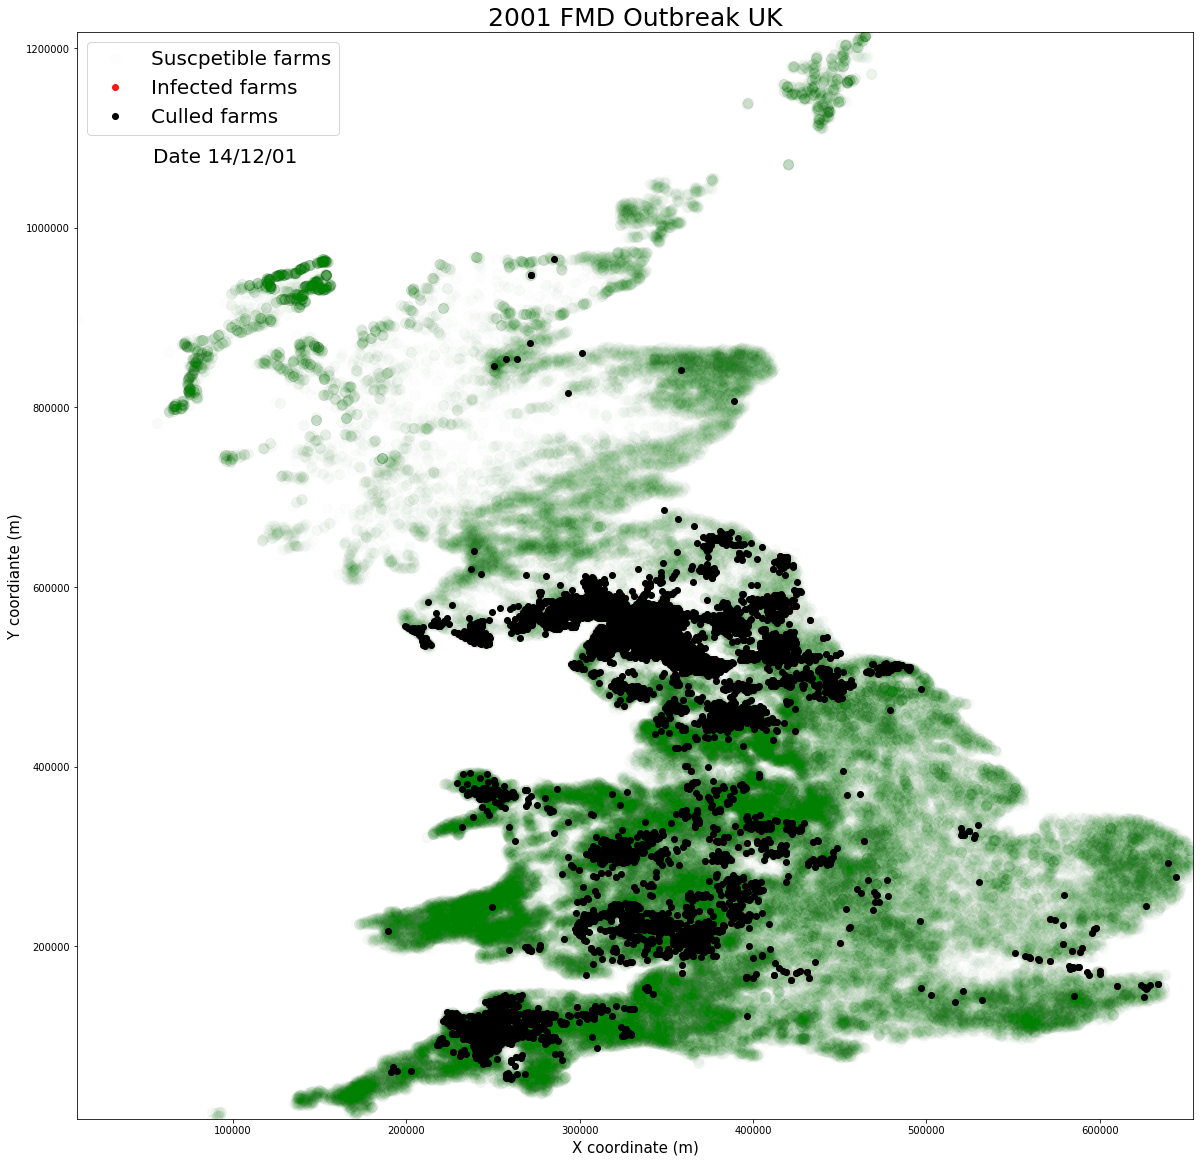

In [33]:
infect = []
culled = []

#appends each day (so that the classes can be colour coordinated)
for i in range(int(np.nanmax(Data['Date Culled'].values)+1)):
    infect.append(Data[Data['Date Infected']<=i])
    culled.append(Data[Data['Date Culled']<=i])

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (20,20))
# All suscpetible farms initally
ax = plt.axes(xlim=(min(Data['X coordinate']), max(Data['X coordinate'])), 
              ylim=(min(Data['Y coordinate']), max(Data['Y coordinate'])))
ax.plot(Data['X coordinate'], Data['Y coordinate'], 'o', alpha=.01, ms=10, label = 'Suscpetible farms',color = 'green')
line2,  = ax.plot([], [], 'o', color = 'r', alpha = 0.9, label = 'Infected farms')
line3,  = ax.plot([], [], 'o', color = 'k', alpha = 1, label = 'Culled farms')
time_text = ax.text(0.068, 0.88, '', transform=ax.transAxes, fontsize = 20)

# initialization function: plot the background of each frame
def init():
    line2.set_data([],[])
    line3.set_data([],[])
    time_text.set_text('')
    return line2, line3,

# animation function of dataframes' list
def animate(i):
    line2.set_data(infect[i]['X coordinate'], infect[i]['Y coordinate'])
    line3.set_data(culled[i]['X coordinate'], culled[i]['Y coordinate'])
    if (i+17)<=28:
        time_text.set_text('Date {}/02/01'.format(i+17))
    elif 28<i+17<=59:
        time_text.set_text('Date {}/03/01'.format(i+17-28))
    elif 59<(i+17)<=89:
        time_text.set_text('Date {}/04/01'.format(i+17-59))
    elif 89<(i+17)<=120:
        time_text.set_text('Date {}/05/01'.format(i+17-89))
    elif 120<(i+17)<=150:
        time_text.set_text('Date {}/06/01'.format(i+17-120))
    elif 150<(i+17)<=181:
        time_text.set_text('Date {}/07/01'.format(i+17-150))
    elif 181<(i+17)<=212:
        time_text.set_text('Date {}/08/01'.format(i+17-181))
    elif 212<(i+17)<=242:
        time_text.set_text('Date {}/09/01'.format(i+17-212))
    elif 242<(i+17)<= 273:
        time_text.set_text('Date {}/10/01'.format(i+17-242))
    elif 273<(i+17)<= 303:
        time_text.set_text('Date {}/11/01'.format(i+17-273))
    elif 303<(i+17)<= len(culled):
        time_text.set_text('Date {}/12/01'.format(i+17-303)) 
    return  line2, line3, time_text

# call the animator, frames*(1/fps) is the speed of the animation.
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(culled), init_func=init, interval=20, blit=True)
plt.legend(loc = 'upper left', prop={'size': 20})
plt.title('2001 FMD Outbreak UK', fontsize = 25)
plt.xlabel('X coordinate (m)', fontsize = 15)
plt.ylabel('Y coordiante (m)', fontsize = 15)
anim.save('FMD2001.mp4', fps=1.5)

In [16]:
import numpy as np
from scipy.optimize import brentq

def intersection_area(d, R, r):
    """Return the area of intersection of two circles.

    The circles have radii R and r, and their centres are separated by d.

    """
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d) / (2*r))
    return ( r2 * alpha + R2 * alpha -
              (r2 * np.sin(2*alpha))
           )

In [75]:
area_per_day = []
r = 10000
# for i in range(10):
# for i in range(int(np.nanmax(Data['Date Culled'].values)+1)):
for index, j in enumerate(infect):
    area_overlap = 0
    xinput = infect[index]['X coordinate'].values
    yinput = infect[index]['Y coordinate'].values
    joinedinput = np.column_stack((xinput, yinput))
    dist = distance.cdist(joinedinput, joinedinput, 'euclidean')
#     area_overlap = 0
    if dist.sum()>0:
        for k in range(len(dist[:,0])):
            for m in range(len(dist[0,:])):
                if k<m:
                    area_overlap += intersection_area(dist[k,m], r, r)
    print('area overlapt', area_overlap)            
#     print('area', len(infect[index])*np.pi*r**2 - area_overlap)
#     area_per_day.append(len(infect[index])*np.pi*r**2 - area_overlap)

area overlapt 0
area overlapt 0
area overlapt 0
area overlapt 193719612.41315567
area overlapt 193719612.41315567
area overlapt 502794600.1754836
area overlapt 503702834.7203256
area overlapt 503702834.7203256
area overlapt 1927375957.5488164
area overlapt 2480282059.1419067
area overlapt 3870871931.1518025
area overlapt 8022132834.750323
area overlapt 15902187473.277252
area overlapt 24219075086.569088
area overlapt 31770413061.187046
area overlapt 39190856426.636604
area overlapt 52528897705.350266
area overlapt 81595242062.0317
area overlapt 103545486416.80632
area overlapt 130015486455.85397
area overlapt 166803954053.7431
area overlapt 189666469803.50403
area overlapt 222457235349.95816
area overlapt 268147547720.1196
area overlapt 340310393477.8965
area overlapt 389921049175.595
area overlapt 437004505878.04456
area overlapt 473577848934.25244
area overlapt 546081796160.4001
area overlapt 709712389848.8085
area overlapt 923192116265.1638
area overlapt 1110750535001.1208
area over

KeyboardInterrupt: 

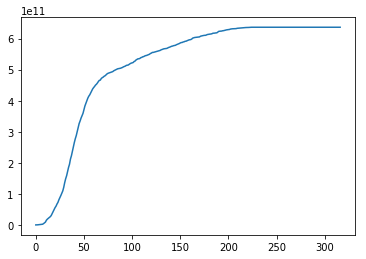

In [53]:
plt.plot(range(int(np.nanmax(Data['Date Culled'].values)+1)), area_per_day)

In [60]:
xinput = infect[3]['X coordinate'].values
yinput = infect[3]['Y coordinate'].values
joinedinput = np.column_stack((xinput, yinput))
dist = distance.cdist(joinedinput, joinedinput, 'euclidean')